# EXPLORATORY DATA ANALYSIS OF LOAN PAYMENTS

#### The following is an EDA on Loan Payments Dataset downloaded from Kaggle.The project analyses the personal information of the bank's clients and help us gain insights to fake more informed decisions in future

importing all necessary libraries

In [147]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime

importing the dataset

In [148]:
df = pd.read_csv('D:\loan_project\Loan_payments_data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [149]:
df.shape

(500, 11)

In [150]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [152]:
# first we have to convert dates to date type
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])
df['paid_off_time']=pd.to_datetime(df['paid_off_time'])


In [153]:
# past due dates nan values = 0
df['past_due_days']= df['past_due_days'].fillna(0)

In [154]:
#we have past due date values and due dates so we can compute paid_odd datesp=df[df.isna().any(axis=1)]
for day in p['past_due_days']: 
    p['paid_off_time']= p['due_date'] + pd.DateOffset(days= day)

In [155]:
df= df.dropna()
df = pd.concat([df,p])
df.isna().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

#### Data is clean and ready to use for analysis.


In [156]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female


In [157]:
df['time_taken']= df['paid_off_time']- df['effective_date']
df['time_taken']=df['time_taken'].dt.days
#we have time takem by every ID to repay the loan
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,time_taken
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,0.0,45,High School or Below,male,6
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0.0,50,Bechalor,female,29
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,0.0,33,Bechalor,female,17
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,0.0,27,college,male,14
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,0.0,28,college,female,14


We added another column 'time_taken' by subtracting the paid off date and effective date

In [178]:
loan_status = df['loan_status'].value_counts()
pd.DataFrame(loan_status)


,loan_status
PAIDOFF,300
COLLECTION_PAIDOFF,100
COLLECTION,100


Text(0, 0.5, 'Count')

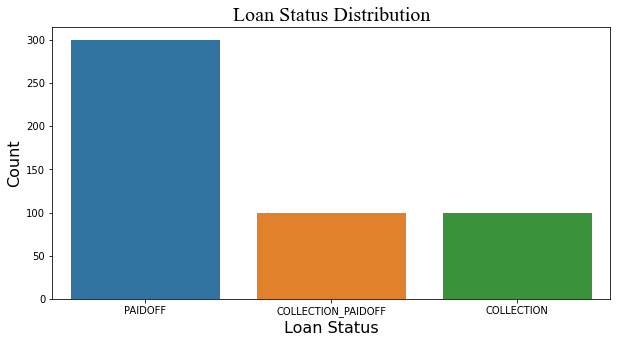

In [203]:
plt.figure(figsize = [10,5])
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution',fontsize=20,fontdict={'fontname':'Times New Roman'})
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Count', fontsize=16)

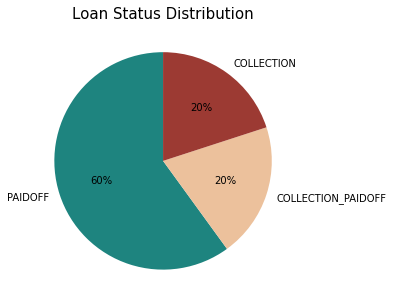

In [452]:
plt.figure(figsize = [10,5])
plt.pie(df['loan_status'].value_counts(),labels=df['loan_status'].unique(),explode=[0,0,0],startangle=90,autopct='%1.f%%', colors=['#1e847f', '#ecc19c', '#9c3a33'])
plt.title('Loan Status Distribution',fontsize = 15)
plt.show()

60% of loans are pain off.

In [455]:
date_eff=df.groupby(['effective_date'])['loan_status'].value_counts()
date_eff=pd.DataFrame(date_eff)
date_eff

loan_status
effective_date loan_status                    
2016-09-08     PAIDOFF                       4
2016-09-09     COLLECTION                    5
               COLLECTION_PAIDOFF            5
               PAIDOFF                       5
2016-09-10     COLLECTION                   20
               PAIDOFF                      19
               COLLECTION_PAIDOFF            7
2016-09-11     PAIDOFF                     119
               COLLECTION                   71
               COLLECTION_PAIDOFF           41
2016-09-12     PAIDOFF                      97
               COLLECTION_PAIDOFF           47
               COLLECTION                    4
2016-09-13     PAIDOFF                      23
2016-09-14     PAIDOFF                      33

In [462]:
Effective_Date = df['effective_date'].dt.date.value_counts()
pd.DataFrame(Effective_Date)

,effective_date
2016-09-11,231
2016-09-12,148
2016-09-10,46
2016-09-14,33
2016-09-13,23
2016-09-09,15
2016-09-08,4


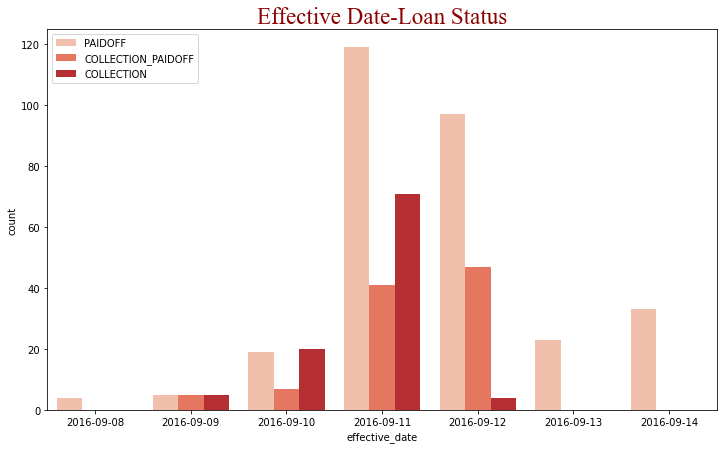

In [456]:
plt.figure(figsize = [12,7])
dates = df['effective_date'].dt.date
sns.countplot(x=dates,hue=df['loan_status'],palette='Reds')
plt.title('Effective Date-Loan Status',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.legend( loc='upper left')
plt.show()


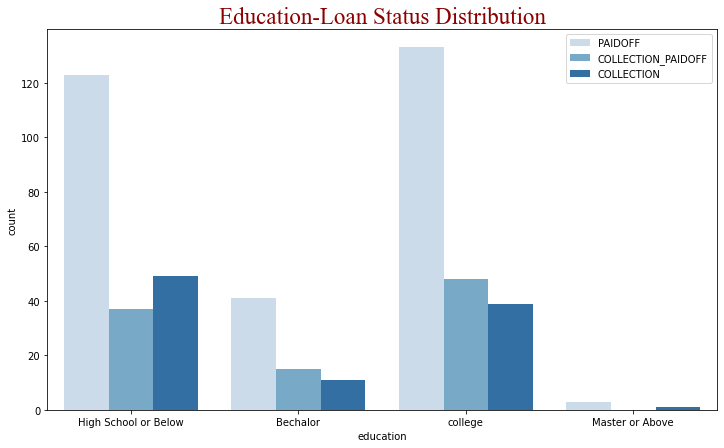

In [457]:
plt.figure(figsize = [12,7])
education = df['education']
sns.countplot(x=education,hue=df['loan_status'],palette='Blues')
plt.title('Education-Loan Status Distribution',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.legend( loc='upper right')
plt.show()


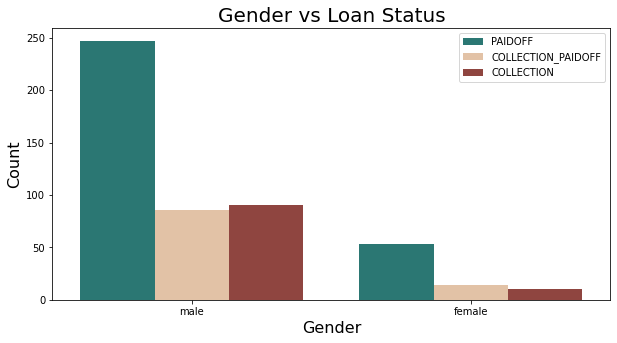

In [458]:
plt.figure(figsize = [10,5])
sns.countplot(df['Gender'],hue=df['loan_status'], palette=('#1e847f', '#ecc19c', '#9c3a33'))
plt.legend(loc='upper right')
plt.title('Gender vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

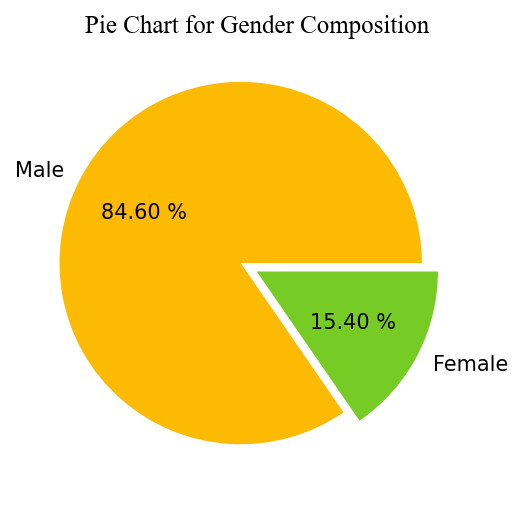

In [466]:
plt.figure(dpi=150)
plt.title('Pie Chart for Gender Composition',fontdict={'fontname':'Times New Roman'})
plt.pie(gender,labels=['Male','Female'],colors=['#fcba03','#76cc25'],autopct='%.2f %%',pctdistance=0.6,explode=[.1,0])
plt.show()

        Gender
male       423
female      77


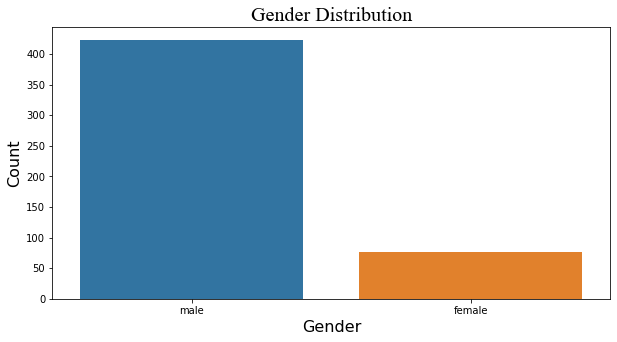

In [465]:
gender= df['Gender'].value_counts()
print(pd.DataFrame(gender))
plt.figure(figsize = [10,5])
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution',fontsize=20,fontdict={'fontname':'Times New Roman'})
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Even though we observe great disparity between the male-female bars but to infer that male loans are pain off might be a gender bias decision as in the dataset the the difference between the number ofmales and females is high which might have caused underrepresentation of a gender causing bias.

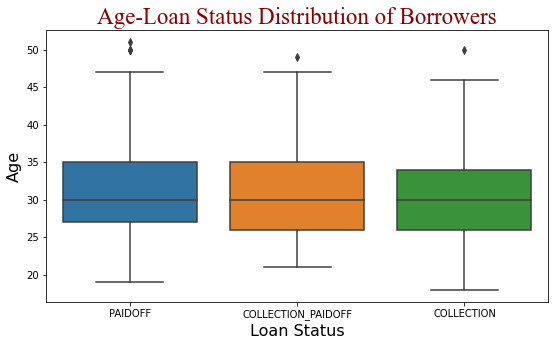

In [459]:
%matplotlib inline
plt.figure(figsize = [9,5])
sns.boxplot(x='loan_status', y='age', data=df)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.title('Age-Loan Status Distribution of Borrowers',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.show()

In [467]:
edu = df['education'].value_counts()
pd.DataFrame(edu)

,education
college,220
High School or Below,209
Bechalor,67
Master or Above,4


In [468]:
education = df.groupby('education').mean()
education= education.drop(['age'],axis=1)
education

,Principal,terms,past_due_days,time_taken
education,,,,
Bechalor,944.776119,21.462687,13.074627,30.880597
High School or Below,951.196172,23.631579,16.224880,37.784689
Master or Above,600.000000,11.000000,18.500000,22.250000
college,941.363636,22.686364,13.004545,35.327273


In [469]:
ed=df.groupby('education').count()
ed= ed['Principal']
ed = pd.DataFrame(ed)
ed
#education level of loan seekers

,Principal
education,
Bechalor,67
High School or Below,209
Master or Above,4
college,220


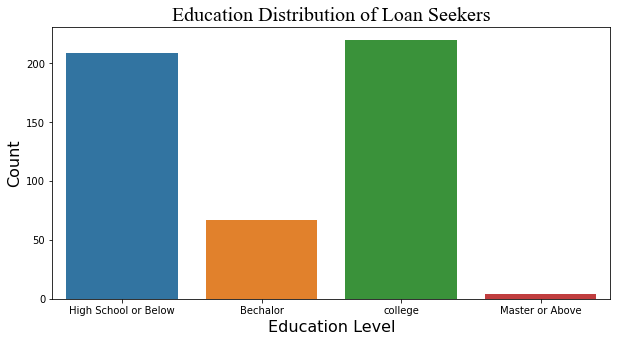

In [470]:
plt.figure(figsize = [10,5])
sns.countplot(x='education', data=df)
plt.title('Education Distribution of Loan Seekers',fontsize=20,fontdict={'fontname':'Times New Roman'})
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

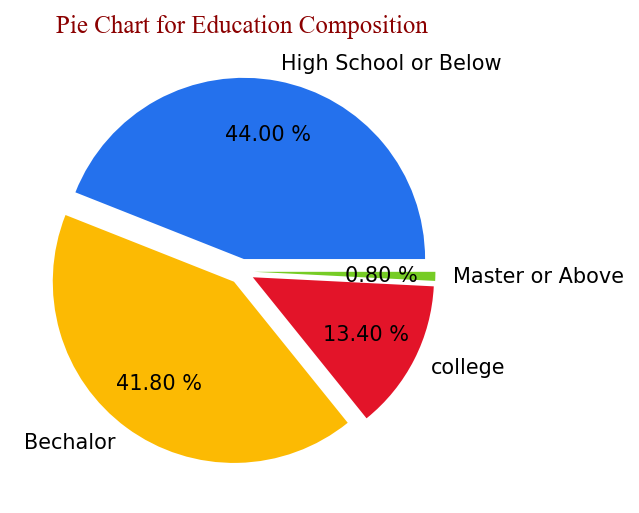

In [359]:
edu_lab = pd.unique(df['education'])
plt.figure(dpi=150)
plt.title('Pie Chart for Education Composition',fontdict={'fontname':'Times New Roman','color':'darkred'})
plt.pie(edu,labels=edu_lab,startangle=0,colors=['#2471ed','#fcba03','#e31429','#76cc25'],autopct='%.2f %%',pctdistance=0.7,explode=[0.07,0.07,0.07,0.07])
plt.show()

we can observe that the majority of loan seekers had the degree of education of high school or below and college.

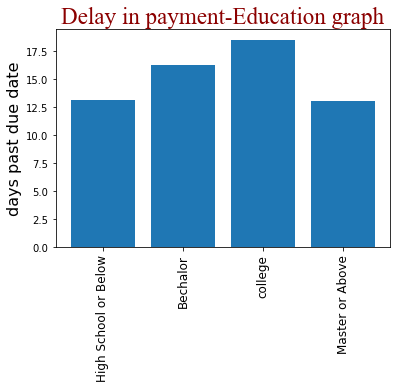

In [270]:
plt.bar(edu_lab,education['past_due_days'])
plt.xticks(rotation=90,fontsize=12)
plt.title('Delay in payment-Education graph',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.ylabel('days past due date', fontsize=16)
plt.show()

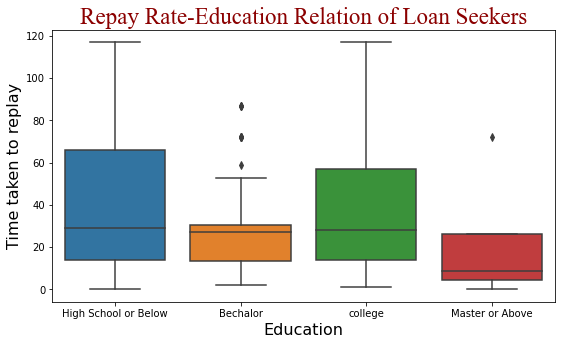

In [474]:
%matplotlib inline
plt.figure(figsize = [9,5])
sns.boxplot(x='education', y='time_taken', data=df)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Time taken to replay', fontsize=16)
plt.title('Repay Rate-Education Relation of Loan Seekers',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.show()

The repay rate of loan seekers who have a Masters degree or above is the fastest.

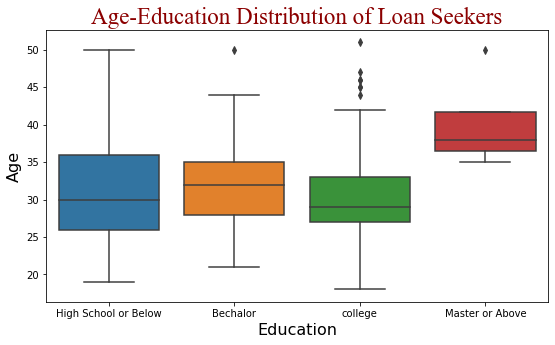

In [476]:
%matplotlib inline
plt.figure(figsize = [9,5])
sns.boxplot(x='education', y='age', data=df)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.title('Age-Education Distribution of Loan Seekers',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.show()

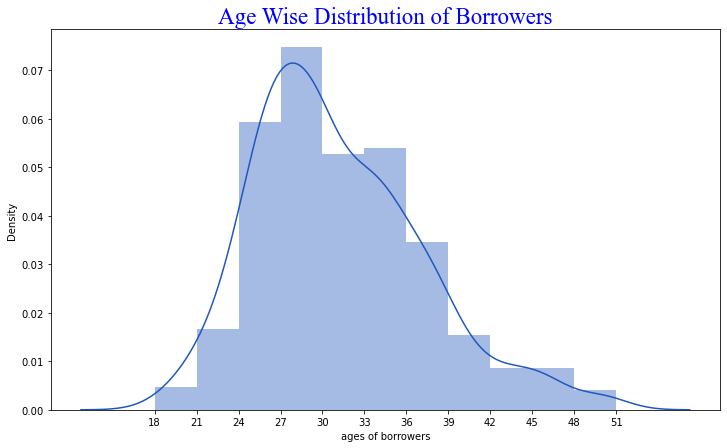

In [451]:
bins= list(range(18,52,3))
plt.figure(figsize = [12,7])
sns.distplot(df.age,bins=bins,color='#2057bd')
plt.xticks(bins)
plt.xlabel('ages of borrowers')
plt.title('Age Wise Distribution of Borrowers',fontdict={'fontname':'Times New Roman','color':'Blue'},fontsize=23)
plt.show()

We oberve that most number of loans are taken by the 27-30 years old age group.

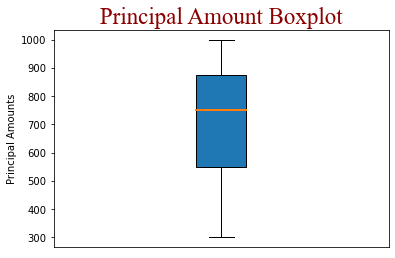

In [473]:
box=plt.boxplot( df['Principal'].unique(),patch_artist=True, medianprops={'linewidth': 2})
plt.gca().set_xticks([])
plt.ylabel('Principal Amounts')
plt.title('Principal Amount Boxplot',fontdict={'fontname':'Times New Roman','color':'darkred'},fontsize=23)
plt.show()

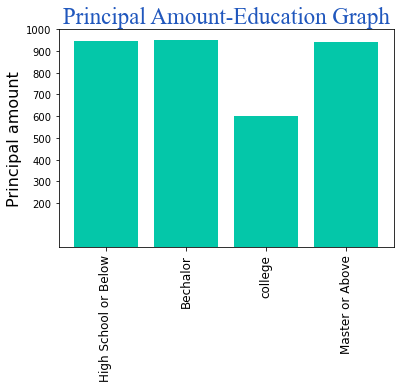

In [472]:
plt.bar(edu_lab,education['Principal'],color='#04c7a9')
plt.xticks(rotation=90,fontsize=12)
bins=list(range(200,1100,100))
plt.title('Principal Amount-Education Graph',fontdict={'fontname':'Times New Roman','color':'#2057bd'},fontsize=23)
plt.ylabel('Principal amount', fontsize=16)
plt.yticks(bins)

plt.show()

<AxesSubplot:>

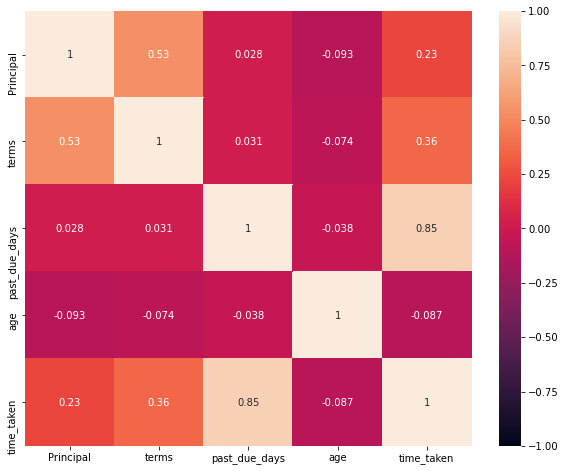

In [412]:
correlation = df[df.columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

We can see thast the heatmap is not very helpful here as their is no significant correlation between the attributes.